In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-02 08:35:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.43MB/s    in 4m 58s  

2021-05-02 08:40:01 (1.03 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [6]:
train_datagenerator = ImageDataGenerator(rescale=1./255,rotation_range=20,horizontal_flip=True,
                               shear_range=0.2,fill_mode='nearest',validation_split=0.4)


In [7]:
train_generator = train_datagenerator.flow_from_directory(base_dir,target_size=(150,150),shuffle=True,subset='training')

val_generator = train_datagenerator.flow_from_directory(base_dir,target_size=(150,150),subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=15,
    validation_data=val_generator,
    validation_steps=4,
    verbose=2
)

Epoch 1/15
16/16 - 17s - loss: 1.3754 - accuracy: 0.3711 - val_loss: 1.0816 - val_accuracy: 0.5078
Epoch 2/15
16/16 - 15s - loss: 1.0051 - accuracy: 0.5104 - val_loss: 1.0580 - val_accuracy: 0.4375
Epoch 3/15
16/16 - 15s - loss: 0.8614 - accuracy: 0.6348 - val_loss: 0.7189 - val_accuracy: 0.7109
Epoch 4/15
16/16 - 15s - loss: 0.6915 - accuracy: 0.7427 - val_loss: 0.5687 - val_accuracy: 0.7578
Epoch 5/15
16/16 - 15s - loss: 0.4945 - accuracy: 0.8242 - val_loss: 0.3203 - val_accuracy: 0.8750
Epoch 6/15
16/16 - 15s - loss: 0.4057 - accuracy: 0.8527 - val_loss: 0.3367 - val_accuracy: 0.8906
Epoch 7/15
16/16 - 14s - loss: 0.2892 - accuracy: 0.8963 - val_loss: 0.5701 - val_accuracy: 0.7656
Epoch 8/15
16/16 - 15s - loss: 0.3752 - accuracy: 0.8672 - val_loss: 0.2869 - val_accuracy: 0.9219
Epoch 9/15
16/16 - 14s - loss: 0.2825 - accuracy: 0.8983 - val_loss: 0.2861 - val_accuracy: 0.8906
Epoch 10/15
16/16 - 15s - loss: 0.2257 - accuracy: 0.9191 - val_loss: 0.1028 - val_accuracy: 0.9688
Epoch 11/

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 1UXuUYJ4rVj2eSvt.png to 1UXuUYJ4rVj2eSvt.png
1UXuUYJ4rVj2eSvt.png
rock


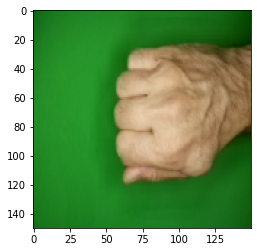

In [20]:
uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')